In [6]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('C:/Users/User/Desktop/project/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
df.shape

(96453, 12)

Exploratory Data Analysis :
Remove variables which do not have much impact on the prediction. Calculate the value of loud cover: it is same for all rows, so we can remove it.

In [5]:
df['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Loud Cover'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>]], dtype=object)

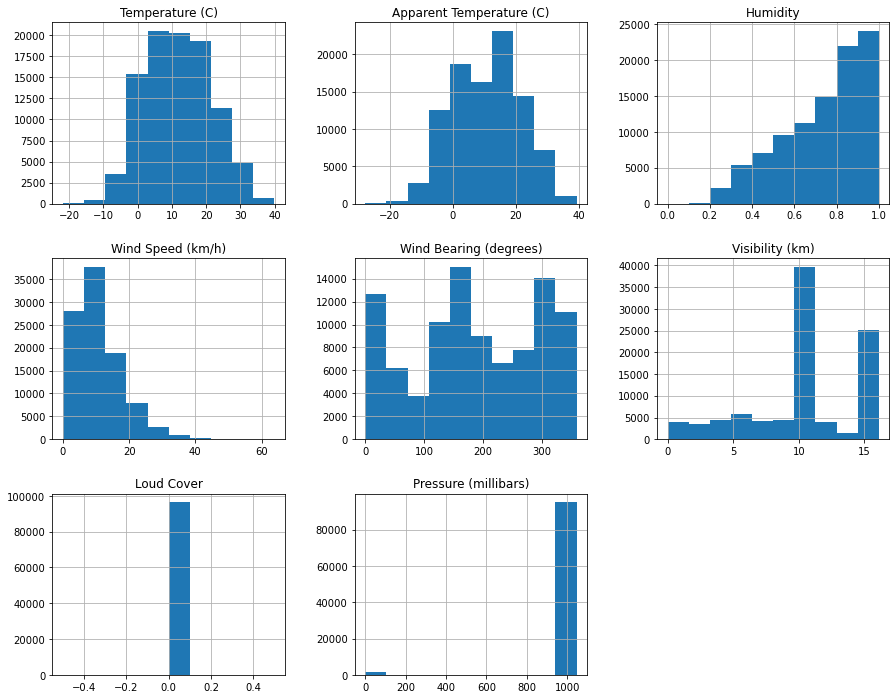

In [6]:
# draw histograms of column with type float64
df.hist(figsize=(15, 12))

<Figure size 14400x14400 with 0 Axes>

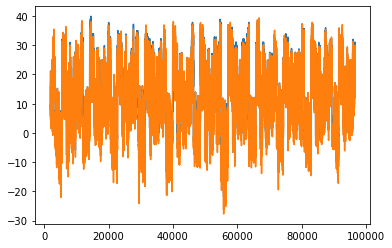

<Figure size 14400x14400 with 0 Axes>

In [7]:
x1 = np.linspace(2000, 96453, 96453)
y1 = df['Temperature (C)']
y2 = df['Apparent Temperature (C)']
plt.plot(x1, y1)
plt.plot(x1, y2)
plt.figure(figsize=(200, 200))

How many times Temperature (C)  Apparent Temperature (C) equals

In [8]:
df['correct']= np.where(df['Temperature (C)'] == df['Apparent Temperature (C)'],df['Temperature (C)'], np.nan)
df['correct'].count()

55776

<AxesSubplot:>

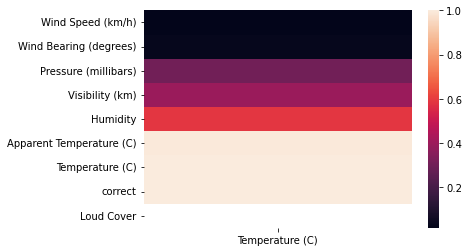

In [9]:
sns.heatmap(df.corr('spearman').abs()[['Temperature (C)']].sort_values('Temperature (C)'))

In [10]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

the number of times when the Precip Type is exactly snow.

In [11]:

df.groupby('Precip Type').get_group('snow')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,correct
1562,2006-12-13 02:00:00.000 +0100,Foggy,snow,-0.483333,-4.150000,1.00,11.0929,219.0,0.4830,0.0,1031.56,Foggy throughout the day.,NaN
1563,2006-12-13 03:00:00.000 +0100,Foggy,snow,-0.483333,-4.061111,0.96,10.7387,200.0,0.3220,0.0,1031.47,Foggy throughout the day.,NaN
1564,2006-12-13 04:00:00.000 +0100,Foggy,snow,-0.922222,-3.477778,1.00,7.0679,206.0,0.1610,0.0,1031.23,Foggy throughout the day.,NaN
1565,2006-12-13 05:00:00.000 +0100,Foggy,snow,-1.038889,-4.400000,1.00,9.4990,199.0,0.1610,0.0,1031.41,Foggy throughout the day.,NaN
1566,2006-12-13 06:00:00.000 +0100,Foggy,snow,-1.088889,-4.438889,1.00,9.4346,219.0,0.3220,0.0,1031.98,Foggy throughout the day.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93265,2016-03-28 05:00:00.000 +0200,Foggy,snow,-0.783333,-2.950000,0.99,6.1019,91.0,3.1073,0.0,1016.30,Foggy in the morning.,NaN
93266,2016-03-28 06:00:00.000 +0200,Foggy,snow,-1.111111,-1.111111,0.93,0.0000,0.0,0.1610,0.0,1016.41,Foggy in the morning.,-1.111111
93267,2016-03-28 07:00:00.000 +0200,Foggy,snow,-1.044444,-1.044444,1.00,0.0000,0.0,0.7728,0.0,1016.60,Foggy in the morning.,-1.044444
93311,2016-03-03 03:00:00.000 +0100,Partly Cloudy,snow,-0.511111,-0.511111,1.00,3.5098,74.0,14.6832,0.0,1004.57,Mostly cloudy throughout the day.,-0.511111


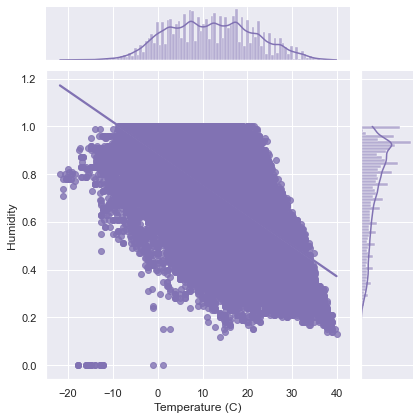

In [12]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="Temperature (C)", y="Humidity", data=df,kind="reg",color="m")

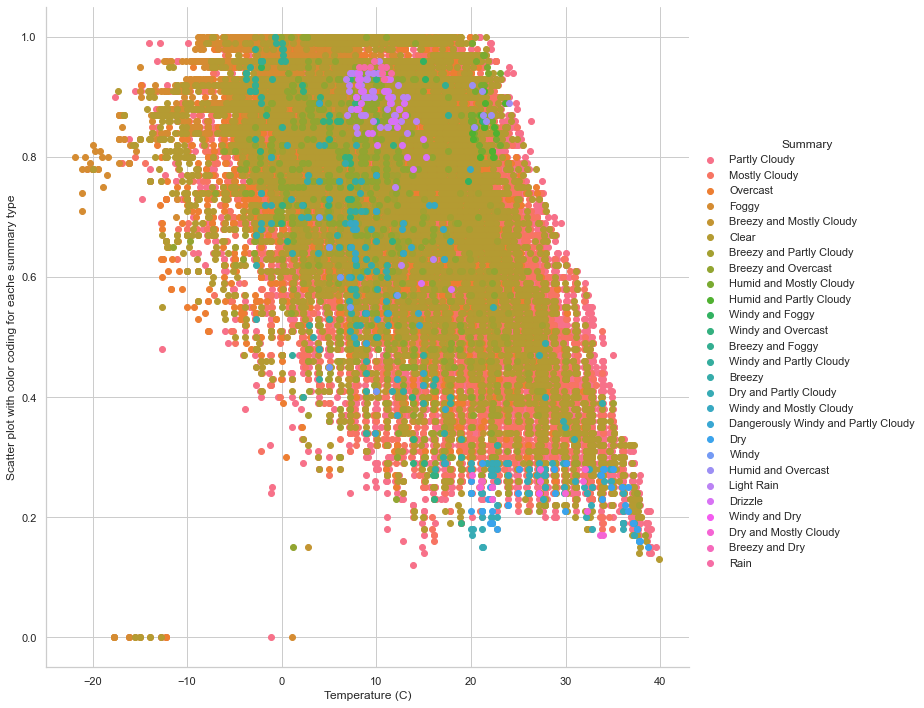

In [13]:
sns.set_theme(style="whitegrid", palette="muted")

ax = sns.FacetGrid(df, hue="Summary", height=10).map(plt.scatter, "Temperature (C)", "Humidity").add_legend()
ax.set(ylabel="Scatter plot with color coding for eache summary type")

 Analysis of Weather Conditions with Temperature(C)

Text(0.5, 1.0, 'Analysis of Weather Conditions with Temperature(C)')

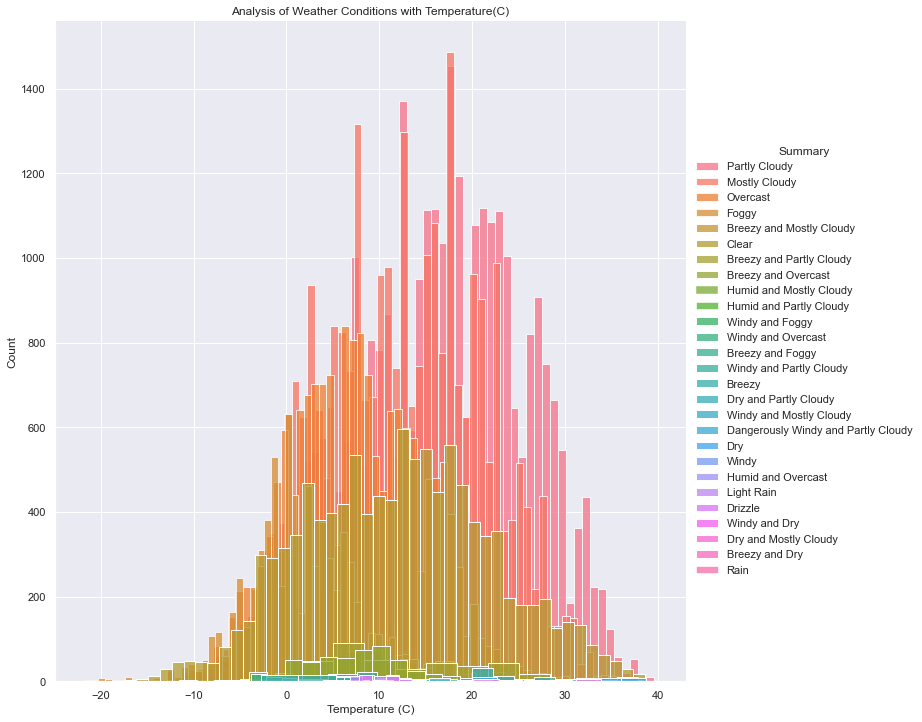

In [14]:

sns.set_style("darkgrid")
sns.FacetGrid(df, hue="Summary", height=10).map(sns.histplot, "Temperature (C)").add_legend()
plt.title("Analysis of Weather Conditions with Temperature(C)")

 also remove Daily Summary, since it is categorical

In [15]:
df['Daily Summary'].value_counts()

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

In [16]:
df.drop(['Daily Summary','Loud Cover'],axis=1,inplace=True)

In [17]:
le = LabelEncoder()
df['Precip Type']=le.fit_transform(df['Precip Type'])
df['Summary']=le.fit_transform(df['Summary'])
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),correct
0,2006-04-01 00:00:00.000 +0200,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,NaN
1,2006-04-01 01:00:00.000 +0200,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,NaN
2,2006-04-01 02:00:00.000 +0200,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,9.377778
3,2006-04-01 03:00:00.000 +0200,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,NaN
4,2006-04-01 04:00:00.000 +0200,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,NaN
5,2006-04-01 05:00:00.000 +0200,19,0,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66,NaN
6,2006-04-01 06:00:00.000 +0200,19,0,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72,NaN
7,2006-04-01 07:00:00.000 +0200,19,0,8.772222,6.527778,0.89,14.1519,260.0,9.9820,1016.84,NaN
8,2006-04-01 08:00:00.000 +0200,19,0,10.822222,10.822222,0.82,11.3183,259.0,9.9820,1017.37,10.822222
9,2006-04-01 09:00:00.000 +0200,19,0,13.772222,13.772222,0.72,12.5258,279.0,9.9820,1017.22,13.772222


In [18]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),correct
0,2006-04-01 00:00:00.000 +0200,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,NaN
1,2006-04-01 01:00:00.000 +0200,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,NaN
2,2006-04-01 02:00:00.000 +0200,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,9.377778
3,2006-04-01 03:00:00.000 +0200,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,NaN
4,2006-04-01 04:00:00.000 +0200,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,NaN


In [19]:
df.isnull().sum()

Formatted Date                  0
Summary                         0
Precip Type                     0
Temperature (C)                 0
Apparent Temperature (C)        0
Humidity                        0
Wind Speed (km/h)               0
Wind Bearing (degrees)          0
Visibility (km)                 0
Pressure (millibars)            0
correct                     40677
dtype: int64

I will use the precip type column as output of the dataset.

In [20]:
df['Precip Type'].value_counts()

0    85224
1    10712
2      517
Name: Precip Type, dtype: int64

In [21]:
df['Summary'].value_counts()

19    31733
17    28094
18    16597
6     10890
12     7148
4       528
3       516
5       386
11       86
26       67
16       63
0        54
25       45
13       40
8        39
2        35
24       35
9        34
15       17
10       14
20       10
21        8
14        7
23        4
22        1
7         1
1         1
Name: Summary, dtype: int64

In [22]:
scaler = StandardScaler()
df[df.columns[2:]] = scaler.fit_transform(df[df.columns[2:]])
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),correct
0,2006-04-01 00:00:00.000 +0200,19,-0.355011,-0.257599,-0.324035,0.793470,0.478635,0.591256,1.306976,0.101685,NaN
1,2006-04-01 01:00:00.000 +0200,19,-0.355011,-0.269814,-0.339097,0.639996,0.499594,0.665756,1.306976,0.105960,NaN
2,2006-04-01 02:00:00.000 +0200,17,-0.355011,-0.267487,-0.138102,0.793470,-0.995473,0.153570,1.099586,0.108610,-0.759678
3,2006-04-01 03:00:00.000 +0200,19,-0.355011,-0.381489,-0.459071,0.486521,0.476306,0.758881,1.306976,0.112628,NaN
4,2006-04-01 04:00:00.000 +0200,17,-0.355011,-0.332631,-0.362469,0.486521,0.033841,0.665756,1.306976,0.113483,NaN


Text(0.5, 0, 'Formatted Date')

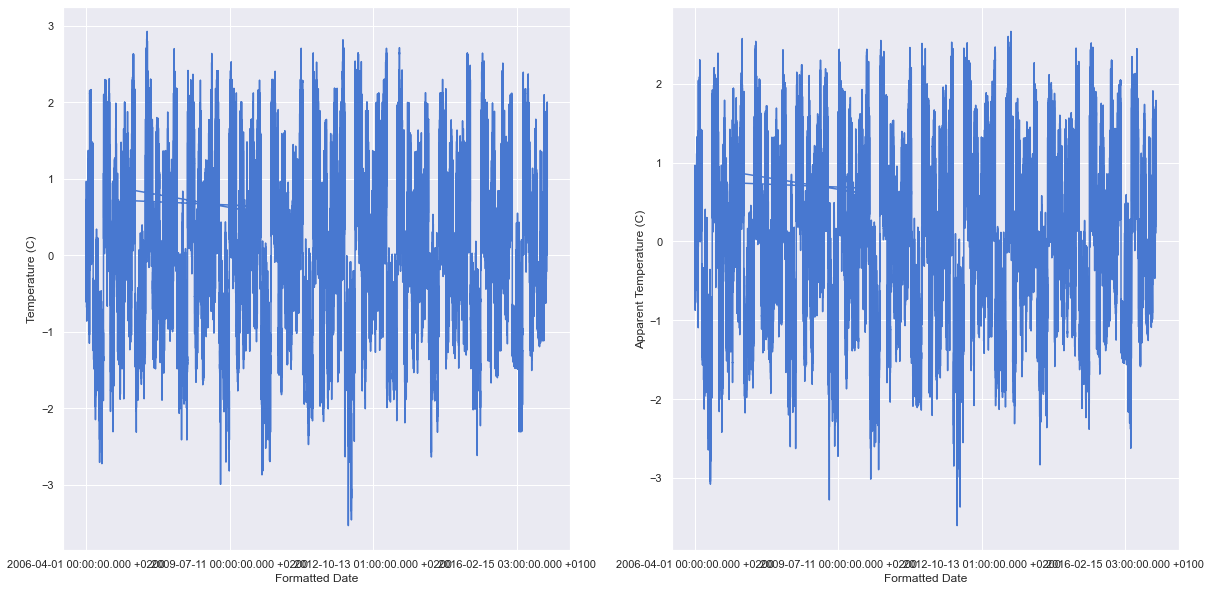

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
ax1.plot(df['Formatted Date'], df['Temperature (C)'])
ax2.plot(df['Formatted Date'], df['Apparent Temperature (C)'])

ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))

ax1.set_ylabel('Temperature (C)')
ax1.set_xlabel('Formatted Date')
ax2.set_ylabel('Apparent Temperature (C)')
ax2.set_xlabel('Formatted Date')

<AxesSubplot:title={'center':'Summary'}, xlabel='Temperature (C)'>

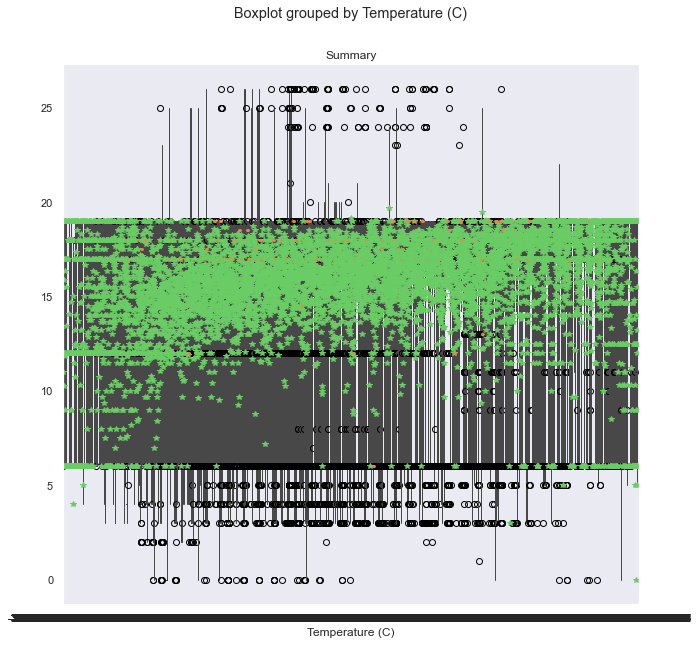

In [24]:
df.boxplot(column = 'Summary', by = 'Temperature (C)', figsize = (10,10),grid=False,medianprops=dict(linewidth=3),meanprops = dict(marker = '*'),showmeans = True)

<AxesSubplot:title={'center':'Summary'}, xlabel='Apparent Temperature (C)'>

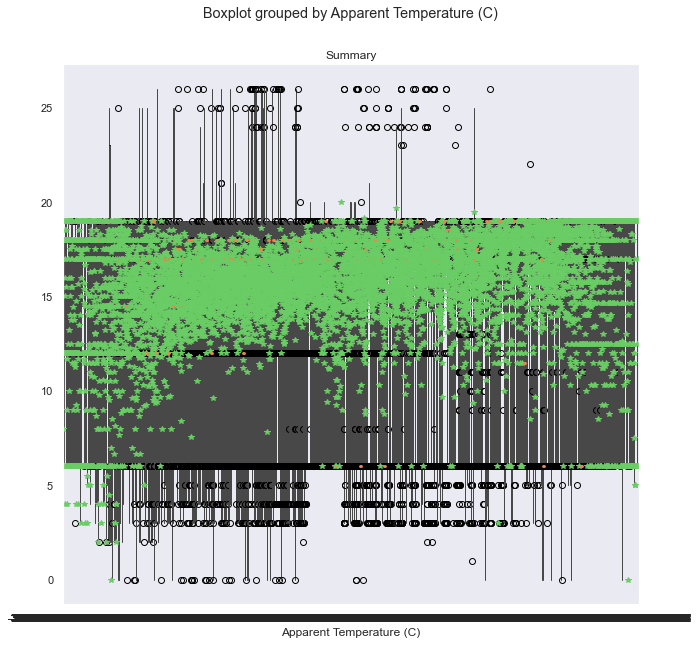

In [25]:
df.boxplot(column = 'Summary', by = 'Apparent Temperature (C)', figsize = (10,10),grid=False,medianprops=dict(linewidth=3),meanprops = dict(marker = '*'),showmeans = True)

In [28]:
#Precip Type, Humidity, Wind Speed (km/h)	Wind Bearing (degrees)	Visibility (km)	Pressure (millibars)

<AxesSubplot:title={'center':'Precip Type'}, xlabel='Apparent Temperature (C)'>

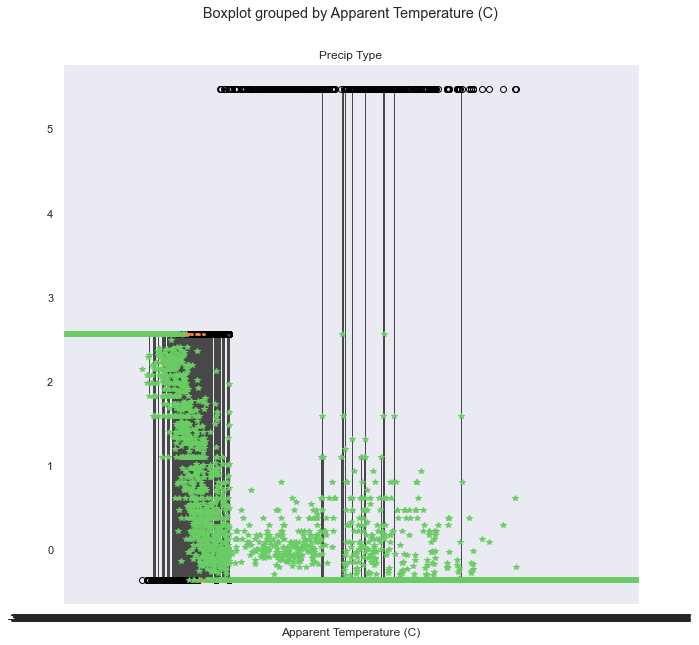

In [29]:
df.boxplot(column = 'Precip Type', by = 'Apparent Temperature (C)', figsize = (10,10),grid=False,medianprops=dict(linewidth=3),meanprops = dict(marker = '*'),showmeans = True)

<AxesSubplot:title={'center':'Humidity'}, xlabel='Apparent Temperature (C)'>

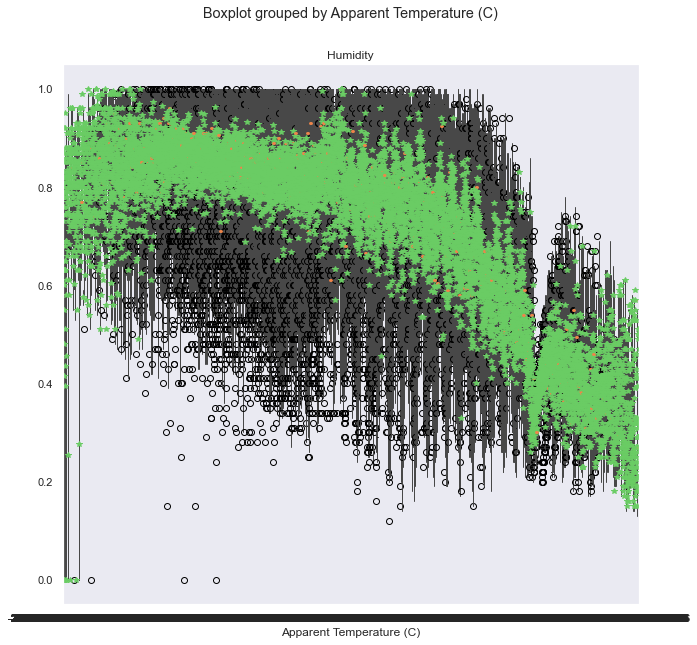

In [67]:
df.boxplot(column = 'Humidity', by = 'Apparent Temperature (C)', figsize = (10,10),grid=False,medianprops=dict(linewidth=3),meanprops = dict(marker = '*'),showmeans = True)

<AxesSubplot:title={'center':'Wind Speed (km/h)'}, xlabel='Apparent Temperature (C)'>

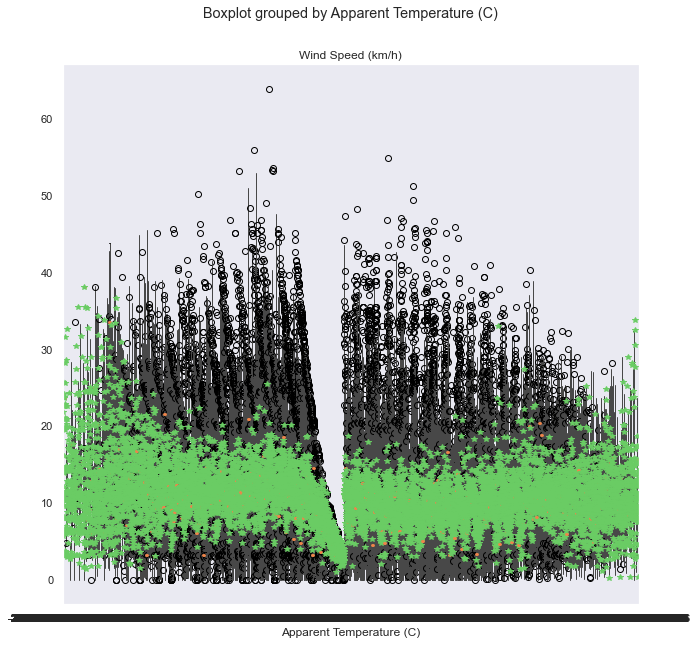

In [68]:
df.boxplot(column = 'Wind Speed (km/h)', by = 'Apparent Temperature (C)', figsize = (10,10),grid=False,medianprops=dict(linewidth=3),meanprops = dict(marker = '*'),showmeans = True)

<AxesSubplot:title={'center':'Wind Bearing (degrees)'}, xlabel='Apparent Temperature (C)'>

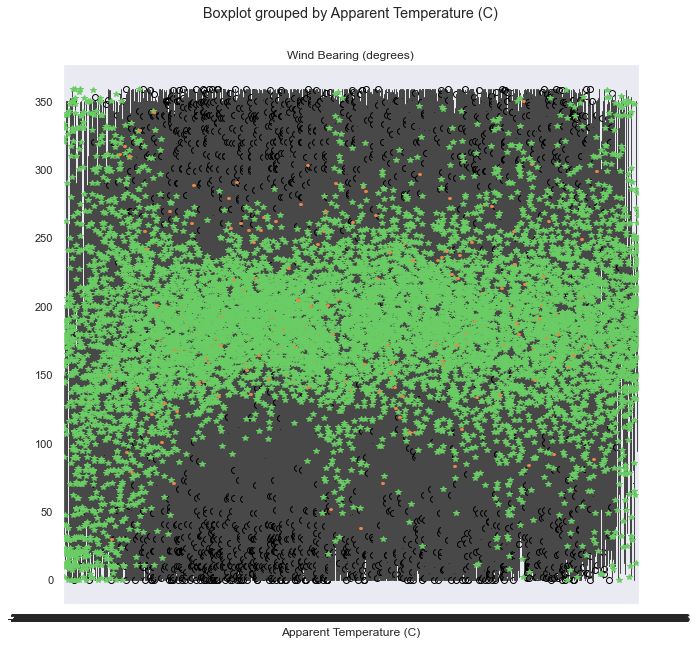

In [69]:
df.boxplot(column = 'Wind Bearing (degrees)', by = 'Apparent Temperature (C)', figsize = (10,10),grid=False,medianprops=dict(linewidth=3),meanprops = dict(marker = '*'),showmeans = True)

<AxesSubplot:title={'center':'Visibility (km)'}, xlabel='Apparent Temperature (C)'>

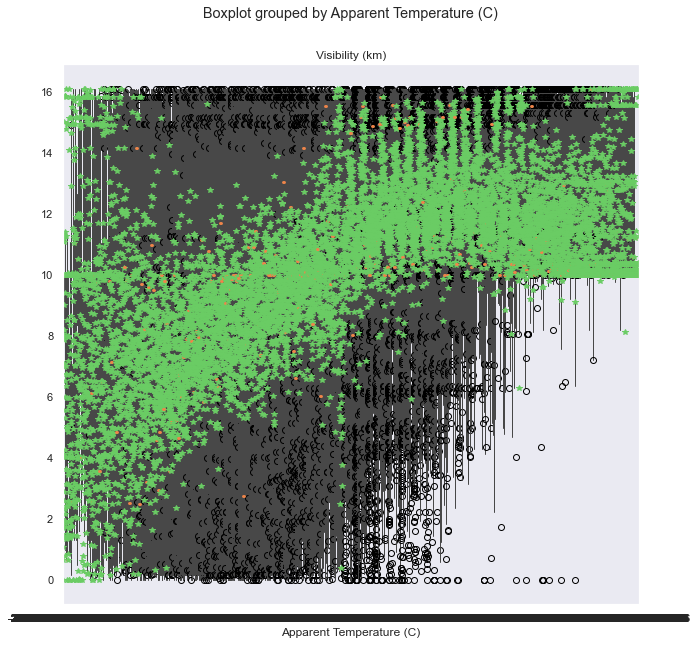

In [70]:
df.boxplot(column = 'Visibility (km)', by = 'Apparent Temperature (C)', figsize = (10,10),grid=False,medianprops=dict(linewidth=3),meanprops = dict(marker = '*'),showmeans = True)

<AxesSubplot:title={'center':'Pressure (millibars)'}, xlabel='Apparent Temperature (C)'>

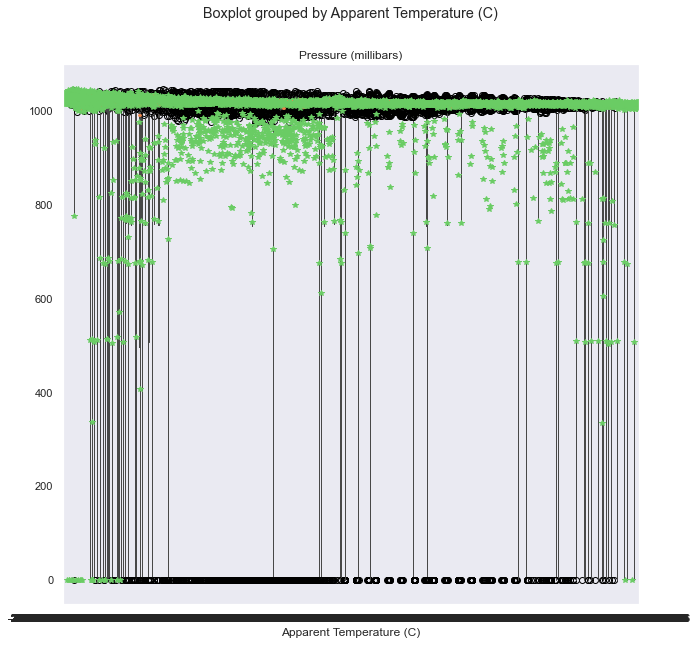

In [71]:
df.boxplot(column = 'Pressure (millibars)', by = 'Apparent Temperature (C)', figsize = (10,10),grid=False,medianprops=dict(linewidth=3),meanprops = dict(marker = '*'),showmeans = True)

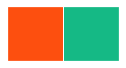

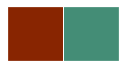

In [30]:
color0 = '#FD4F0F'
color1 = '#15B985'
colordark0 = '#882501'
colordark1 = '#448D76'

colors =[color0,color1]
colorsdark = [colordark0 ,colordark1 ]
sns.palplot(sns.color_palette(colors))
sns.palplot(sns.color_palette(colorsdark))

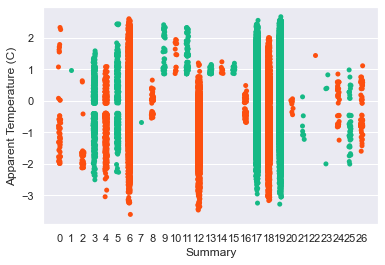

In [31]:
S_mean_notocc = df[df['Summary']==0]['Apparent Temperature (C)'].mean()
S_mean_occ = df[df['Summary']==1]['Apparent Temperature (C)'].mean()

#mean_width = 2

sns.stripplot(x=df['Summary'],y=df['Apparent Temperature (C)'],palette = colors)

#x = plt.gca().axes.get_xticks()

plt.plot([S_mean_notocc], sns.xkcd_rgb["red"])
plt.plot( [S_mean_occ], sns.xkcd_rgb["blue"])
plt.show()

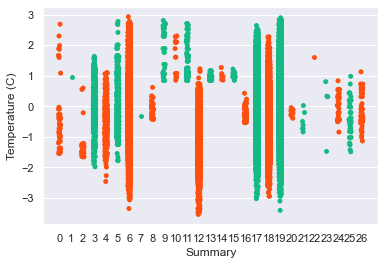

In [32]:
S_mean_notocc = df[df['Summary']==0]['Temperature (C)'].mean()
S1_mean_occ = df[df['Summary']==1]['Temperature (C)'].mean()

#mean_width = 0.5

sns.stripplot(x=df['Summary'],y=df['Temperature (C)'],palette = colors)

#x = plt.gca().axes.get_xticks()

plt.plot([S_mean_notocc], sns.xkcd_rgb["red"])
plt.plot([S1_mean_occ], sns.xkcd_rgb["blue"])
plt.show()

In [34]:
df.shape

(96453, 11)

In [35]:
df.dropna(inplace=True)
df.shape

(55776, 11)

In [40]:
df['Precip Type'].value_counts()

0    52469
1     3027
2      280
Name: Precip Type, dtype: int64

In [41]:
df['Summary'].value_counts()

18    20308
16    17184
17     7529
6      6721
11     3177
3       266
5       178
4       153
10       49
12       40
15       29
7        24
24       23
22       20
14       17
8        15
23       12
19        7
13        7
9         6
0         4
21        3
2         2
20        1
1         1
Name: Summary, dtype: int64

Standardize input features

In [42]:
scaler = StandardScaler()
df[df.columns[2:]] = scaler.fit_transform(df[df.columns[2:]])
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),correct
2,2006-04-01 02:00:00.000 +0200,16,-0.242699,-0.759678,-0.759678,0.888592,-0.791843,0.139541,0.994479,0.100979,-0.759678
8,2006-04-01 08:00:00.000 +0200,18,-0.242699,-0.559506,-0.559506,0.517674,0.289354,0.636349,-0.251565,0.114337,-0.559506
9,2006-04-01 09:00:00.000 +0200,18,-0.242699,-0.150695,-0.150695,-0.012208,0.466021,0.817006,-0.251565,0.112936,-0.150695
10,2006-04-01 10:00:00.000 +0200,18,-0.242699,0.160341,0.160341,-0.277149,1.203308,0.916367,0.054905,0.114804,0.160341
11,2006-04-01 11:00:00.000 +0200,18,-0.242699,0.316629,0.316629,-0.965996,1.528374,1.151222,0.115393,0.117793,0.316629


**Feature Engineering :**
Extract day of year and hour of day

In [43]:
def discretize_date(current_date, t):
    current_date = current_date[:-10]
    cdate = datetime.strptime(current_date, '%Y-%m-%d %H:%M:%S')

    if t == 'hour_sin':
        return np.sin(2 * np.pi * cdate.hour/24.0)
    if t == 'hour_cos':
        return np.cos(2 * np.pi * cdate.hour/24.0)
    if t == 'day_sin':
        return np.sin(2 * np.pi * cdate.timetuple().tm_yday/365.0)
    if t == 'day_cos':
        return np.cos(2 * np.pi * cdate.timetuple().tm_yday/365.0)

In [44]:
date_types = ['hour_sin', 'hour_cos', 'day_sin', 'day_cos']
for dt in date_types:
    df[dt] = df['Formatted Date'].apply(lambda x : discretize_date(x, dt))
df.drop(['Formatted Date'],axis=1,inplace=True)

(                           Summary  Precip Type  Temperature (C)  \
 Summary                   1.000000    -0.118078         0.191193   
 Precip Type              -0.118078     1.000000        -0.541422   
 Temperature (C)           0.191193    -0.541422         1.000000   
 Apparent Temperature (C)  0.191193    -0.541422         1.000000   
 Humidity                 -0.137957     0.175191        -0.518759   
 Wind Speed (km/h)         0.084177    -0.172403         0.317136   
 Wind Bearing (degrees)    0.038864    -0.024229         0.027619   
 Visibility (km)           0.129828    -0.317517         0.436935   
 Pressure (millibars)      0.111859     0.030302        -0.028021   
 correct                   0.191193    -0.541422         1.000000   
 hour_sin                 -0.136505     0.043074        -0.173999   
 hour_cos                 -0.150465     0.031393        -0.180936   
 day_sin                   0.081952     0.058150        -0.109402   
 day_cos                  -0.11880

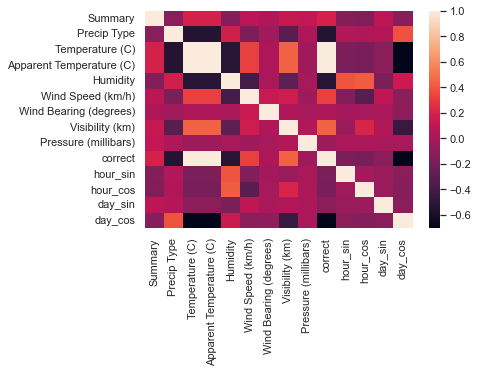

In [45]:
df.corr() 
pd.set_option('display.max_columns', 10)

correlation = df.corr()
correlation, sns.heatmap(correlation)

Apparent Temperature and Temperature are highly correlated (correlation almost equal to 1). So, we can drop one of them.

In [46]:
df.drop(['Apparent Temperature (C)'],axis=1,inplace=True)

Train Test Splitting

In [47]:
y=df.iloc[:,0] 
X = df.iloc[:,1:] 

In [48]:
X

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),...,correct,hour_sin,hour_cos,day_sin,day_cos
2,-0.242699,-0.759678,0.888592,-0.791843,0.139541,...,-0.759678,0.500000,0.866025,0.999991,0.004304
8,-0.242699,-0.559506,0.517674,0.289354,0.636349,...,-0.559506,0.866025,-0.500000,0.999991,0.004304
9,-0.242699,-0.150695,-0.012208,0.466021,0.817006,...,-0.150695,0.707107,-0.707107,0.999991,0.004304
10,-0.242699,0.160341,-0.277149,1.203308,0.916367,...,0.160341,0.500000,-0.866025,0.999991,0.004304
11,-0.242699,0.316629,-0.965996,1.528374,1.151222,...,0.316629,0.258819,-0.965926,0.999991,0.004304
...,...,...,...,...,...,...,...,...,...,...,...
96448,-0.242699,1.546143,-1.548866,0.242243,-1.423143,...,1.546143,-0.965926,0.258819,-0.936881,-0.349647
96449,-0.242699,1.347511,-1.283925,0.110333,-1.522505,...,1.347511,-0.866025,0.500000,-0.936881,-0.349647
96450,-0.242699,0.994902,-0.860019,-0.052200,-1.432176,...,0.994902,-0.707107,0.707107,-0.936881,-0.349647
96451,-0.242699,0.923302,-0.648066,0.173932,-1.522505,...,0.923302,-0.500000,0.866025,-0.936881,-0.349647


In [49]:
y

2        16
8        18
9        18
10       18
11       18
         ..
96448    18
96449    18
96450    18
96451    18
96452    18
Name: Summary, Length: 55776, dtype: int64

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [51]:
X_train.shape

(39043, 12)

In [52]:
X_test.shape

(16733, 12)

Training the Model

In [53]:
model = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

 Accuracy

In [54]:

accuracy_score(y_test, y_pred)

0.6279806370644834

In [57]:
X_train.columns[:-4]

Index(['Precip Type', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'correct'],
      dtype='object')

Model training without the datetime feature

In [55]:
model = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
model.fit(X_train[X_train.columns[:-4]],y_train)
y_pred = model.predict(X_test[X_test.columns[:-4]])

In [56]:
accuracy_score(y_test, y_pred)

0.5407279029462738

***Classification****

In [89]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, recall_score, precision_score
from sklearn import svm, datasets, tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
import math

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0)

In [93]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [101]:
y_pred = classifier.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [103]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

In [104]:
cm

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,   17,    1,    3,    0,    0,    0,    0,    0,    0,    0,
           0,    6,    0,    1,    0,    0,    0,    0,    0],
       [   0,    6,    7,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    1,    2,    0,    0,    0,    0,    0,    0],
       [   0,    9,    3,    5,    0,    0,    0,    0,    0,    0,    0,
           0,    2,    0,    4,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  294,    0,    0,    0,    6,    0,    0,
           0,  117,   31,  218,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    1,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    2,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    

In [105]:
ac

0.5322696306920043

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [116]:
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train)
X_test_log= scaler.fit_transform (X_test)

In [118]:
logistic = LogisticRegression( random_state=0)
logistic.fit(X_train, y_train)

D:\Program\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [119]:
y_pred = logistic.predict(X_train_log)
print('Accuracy %s' % accuracy_score(y_train, y_pred))

Accuracy 0.4979879676481135


In [128]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=5ee963b57d54f622cd186710697e1645e459725ed288fff428ca53129760fa19
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [129]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

In [139]:
param_list = {
    'max_depth': [1,2,3,4,5,6,7,8,9],
    'min_samples_split': [2,5,10,20,50,100,150,200],
    'min_samples_leaf': [10,50,100,150,200],
    'criterion': ['gini', 'entropy']
}

dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth=15)

#grid = GridSearch(dec_tree,param_grid=param_list, scoring = 'accuracy')
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [140]:
#dec_tree = grid.best_estimator_
dec_tree

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [141]:
y_pred = dec_tree.predict(X_train)
print('Accuracy %s' % accuracy_score(y_train, y_pred))

Accuracy 0.6963624048766883


**Time series**

In [144]:
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),...,correct,hour_sin,hour_cos,day_sin,day_cos
2,16,-0.242699,-0.759678,0.888592,-0.791843,...,-0.759678,0.500000,0.866025,0.999991,0.004304
8,18,-0.242699,-0.559506,0.517674,0.289354,...,-0.559506,0.866025,-0.500000,0.999991,0.004304
9,18,-0.242699,-0.150695,-0.012208,0.466021,...,-0.150695,0.707107,-0.707107,0.999991,0.004304
10,18,-0.242699,0.160341,-0.277149,1.203308,...,0.160341,0.500000,-0.866025,0.999991,0.004304
11,18,-0.242699,0.316629,-0.965996,1.528374,...,0.316629,0.258819,-0.965926,0.999991,0.004304
...,...,...,...,...,...,...,...,...,...,...,...
96448,18,-0.242699,1.546143,-1.548866,0.242243,...,1.546143,-0.965926,0.258819,-0.936881,-0.349647
96449,18,-0.242699,1.347511,-1.283925,0.110333,...,1.347511,-0.866025,0.500000,-0.936881,-0.349647
96450,18,-0.242699,0.994902,-0.860019,-0.052200,...,0.994902,-0.707107,0.707107,-0.936881,-0.349647
96451,18,-0.242699,0.923302,-0.648066,0.173932,...,0.923302,-0.500000,0.866025,-0.936881,-0.349647


In [5]:
df = pd.read_csv('C:/Users/User/Desktop/project/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [146]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])

In [147]:
df = df.set_index(['Formatted Date'])

In [148]:
df.head(2)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,...,Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,...,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,...,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


Explore Time series

In [ ]:
Summary	Precip Type	Temperature (C)	Apparent Temperature (C)	...	Wind Bearing (degrees)	Visibility (km)	Loud Cover	Pressure (millibars

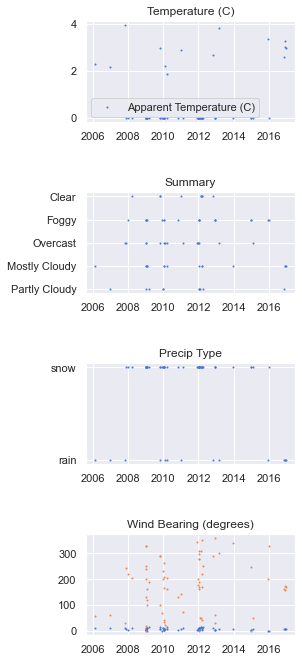

In [156]:
non_occupato = df[df['Apparent Temperature (C)']==0]



plt.figure(figsize=(5,10))
plt.subplot(411)

plt.title('Temperature (C)')
plt.plot(non_occupato.index, non_occupato['Temperature (C)'], label='Apparent Temperature (C)', marker = 'o', markersize=1, linestyle = 'None')

plt.legend(loc='best')

plt.subplot(412)
plt.title('Summary')
plt.plot(non_occupato.index, non_occupato['Summary'], label='Apparent Temperature (C)', marker = 'o', markersize=1, linestyle = 'None')


plt.subplot(413)
plt.title('Precip Type')
plt.plot(non_occupato.index, non_occupato['Precip Type'], label='Apparent Temperature (C)', marker = 'o', markersize=1, linestyle = 'None')


plt.subplot(414)
plt.title('Visibility (km)')
plt.plot(non_occupato.index, non_occupato['Visibility (km)'], label='Apparent Temperature (C)', marker = 'o', markersize=1, linestyle = 'None')



plt.subplot(414)
plt.title('Wind Bearing (degrees)')
plt.plot(non_occupato.index, non_occupato['Wind Bearing (degrees)'], label='Apparent Temperature (C)', marker = 'o', markersize=1, linestyle = 'None')
plt.tight_layout(pad=3.0)
plt.show()

***motif and anomoly detection***

In [157]:
pip install matrixprofile-ts

Note: you may need to restart the kernel to use updated packages.


In [13]:
from matrixprofile import *
from matrixprofile.discords import discords

Temparature 

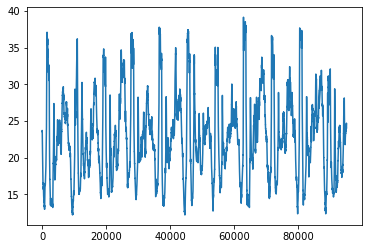

In [14]:
w = 1440
mp_T, mpi_T = matrixProfile.stomp(df['Temperature (C)'].values, w)

plt.plot(mp_T)
plt.show()

In [16]:
mo_T, mod_T  = motifs.motifs(df['Temperature (C)'].values, (mp_T, mpi_T), max_motifs=5)
mo_T,mod_T

([[706,
   4138,
   9490,
   13114,
   14601,
   18250,
   21898,
   27034,
   30658,
   32145,
   35794,
   44554,
   49665,
   53314,
   62098,
   65721,
   70858,
   79615,
   88375,
   92023,
   93510],
  [3297, 12081, 20865, 29625, 38361, 47145, 55929, 64689, 73446, 82206, 90990],
  [2576,
   11360,
   17216,
   20144,
   28904,
   37640,
   46424,
   55208,
   63968,
   72725,
   81485,
   90245],
  [5831,
   8040,
   23423,
   34345,
   39432,
   41183,
   48192,
   51864,
   56976,
   58463,
   60648,
   67247,
   74493,
   78165,
   83253,
   84740],
  [5061,
   6573,
   7294,
   8761,
   10582,
   13869,
   15742,
   19270,
   22701,
   24453,
   25198,
   26302,
   31413,
   33550,
   35066,
   40173,
   42358,
   43822,
   48933,
   51022,
   52585,
   57717,
   59782,
   61369,
   62854,
   66453,
   68277,
   69166,
   70126,
   75234,
   77082,
   78886,
   83994,
   85963,
   87547,
   89131,
   92778,
   94891]],
 [12.20175724477768,
  13.213169146453312,
  13.59143808

In [17]:
df.index[mo_T[0]],df.index[mo_T[1]],df.index[mo_T[2]]

(Int64Index([  706,  4138,  9490, 13114, 14601, 18250, 21898, 27034, 30658,
             32145, 35794, 44554, 49665, 53314, 62098, 65721, 70858, 79615,
             88375, 92023, 93510],
            dtype='int64'),
 Int64Index([3297, 12081, 20865, 29625, 38361, 47145, 55929, 64689, 73446,
             82206, 90990],
            dtype='int64'),
 Int64Index([ 2576, 11360, 17216, 20144, 28904, 37640, 46424, 55208, 63968,
             72725, 81485, 90245],
            dtype='int64'))

In [18]:
anoms_T = discords(mp_T, ex_zone=3, k=20)
anoms_T, df.index[anoms_T]

(array([62848, 63413, 63416, 63309, 63409, 63419, 62844, 63312, 63305,
        63405, 63422, 63315, 63401, 63425, 63286, 63397, 63333, 63336,
        63282, 63289]),
 Int64Index([62848, 63413, 63416, 63309, 63409, 63419, 62844, 63312, 63305,
             63405, 63422, 63315, 63401, 63425, 63286, 63397, 63333, 63336,
             63282, 63289],
            dtype='int64'))

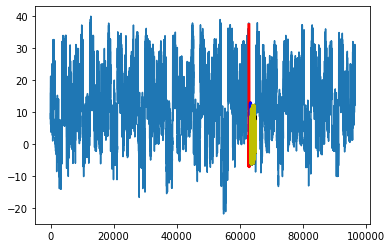

In [19]:
plt.plot(df['Temperature (C)'].values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo_T)]
for a, c in zip(anoms_T, colors):
    a_shape = df['Temperature (C)'].values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

Summary

In [22]:
le = LabelEncoder()
df['Precip Type']=le.fit_transform(df['Precip Type'])
df['Summary']=le.fit_transform(df['Summary'])
#df.head(10)

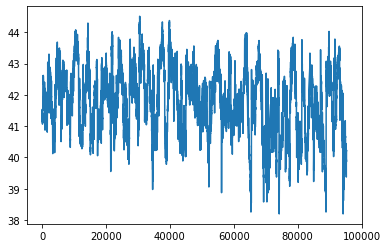

In [23]:
w = 1200
mp_s, mpi_s = matrixProfile.stomp(df['Summary'].values, w)

plt.plot(mp_s)
plt.show()

In [24]:
mo_s, mod_s  = motifs.motifs(df['Summary'].values, (mp_s, mpi_s), max_motifs=5)
mo_s,mod_s

([[598,
   1199,
   1802,
   2899,
   3502,
   4203,
   4808,
   5697,
   6365,
   7148,
   7751,
   8497,
   9336,
   10098,
   10716,
   11465,
   12246,
   13129,
   14211,
   15069,
   16153,
   16828,
   17438,
   18192,
   18975,
   19951,
   20607,
   21383,
   22077,
   23137,
   23785,
   24452,
   25329,
   26405,
   27223,
   28107,
   29169,
   30266,
   30873,
   31536,
   32228,
   33102,
   33831,
   35009,
   35610,
   36213,
   37318,
   38373,
   39168,
   39960,
   40751,
   41379,
   41984,
   42597,
   43223,
   43844,
   44446,
   45536,
   46377,
   47199,
   47831,
   48459,
   49537,
   50170,
   51134,
   52006,
   52800,
   53645,
   54288,
   55100,
   56021,
   57204,
   58295,
   59090,
   59762,
   60655,
   61463,
   62283,
   62896,
   63501,
   64187,
   64990,
   65640,
   66309,
   67149,
   68043,
   68924,
   69980,
   70832,
   71723,
   72533,
   73250,
   74184,
   74971,
   75590,
   76332,
   76941,
   77947,
   78589,
   79472,
   80086,
   8

In [26]:
#df.index[mo_s[0]],df.index[mo_s[1]]

In [27]:
anoms_s = discords(mp_s, ex_zone=3, k=20)
anoms_s, df.index[anoms_s]

(array([30513, 30517, 30520, 30523, 30540, 30532, 30544, 30550, 30526,
        30535, 39829, 39832, 39840, 39836, 37619, 30458, 39818, 39825,
        39793, 30454]),
 Int64Index([30513, 30517, 30520, 30523, 30540, 30532, 30544, 30550, 30526,
             30535, 39829, 39832, 39840, 39836, 37619, 30458, 39818, 39825,
             39793, 30454],
            dtype='int64'))

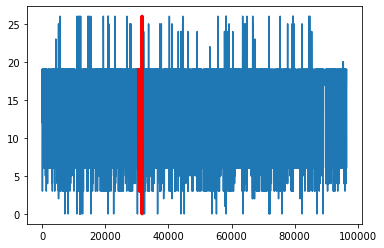

In [28]:
plt.plot(df['Summary'].values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo_s)]
for a, c in zip(anoms_s, colors):
    a_shape = df['Summary'].values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

In [8]:
pip install pywedge --user

  Using cached pywedge-0.5.1.8-py3-none-any.whl (25 kB)
  Using cached plotly-5.9.0-py2.py3-none-any.whl (15.2 MB)
  Using cached catboost-1.0.6-cp39-none-win_amd64.whl (73.9 MB)
  Using cached xgboost-1.6.1-py3-none-win_amd64.whl (125.4 MB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pywedge as pw

In [5]:
x=pw.Pywedge_Charts(df,c=None,y="Humidity")
charts=x.make_charts()

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pywedge\pywedge.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  self.X = self.train.drop(self.y,1)


HTML(value='<h2>Pywedge Make_Charts </h2>')